In [1]:
#sudo apt-get install ffmpeg

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.animation as animation
import numpy as np
import ast

# Read the file and parse the data
with open('output3.txt', 'r') as f:
    lines = f.readlines()[2:]
    
# Initialize lists to hold data
players_positions = []
players_scores = []
times_left = []
nsteps = 2 #staring from 0!

# Parse each line
for line in lines:
    # Remove unwanted text
    line = line[:line.find(", number_of_pushes")].replace("array(", "").replace(")","")
    # Convert string to dictionary
    data = ast.literal_eval(line)
    players_positions.append(data['players_position'])
    players_scores.append(data['players_score'])
    times_left.append(data['time_left'])


for j in range(int(len(players_positions)/10)):
    
    # Convert lists to DataFrame
    df = pd.DataFrame(players_positions)
    df_scores = pd.DataFrame(players_scores)
    df = df[10*j:10*(j+1)]
    
    #add initial state(zeros)
    df = pd.concat([pd.DataFrame([0 for _ in range(df.shape[1])]).T, df]).reset_index(drop = True)

    # Convert lists to DataFrame
    df_scores = df_scores[10*j:10*(j+1)]

    #add initial state(zeros)
    df_scores = pd.concat([pd.DataFrame([0 for _ in range(df_scores.shape[1])]).T, df_scores]).reset_index(drop = True)/80


    # Create a figure and axes
    fig, ax = plt.subplots()

    # Function to update each frame
    def update(i):
        ax.clear()
        x = np.arange(0.5,len(df.columns))
        y_current = df.iloc[i].values
        y_previous = df.iloc[i-1].values if i > 0 else [0]*len(df.columns)
        ax.bar(x+0.5, df_scores.iloc[i].values*2, width=0.2, color = 'lightgreen')
        ax.scatter(x, y_previous, c='grey', s=40)
        ax.scatter(x, y_current, c='white', s=160)
        ax.set_xlabel('Player Number')
        ax.set_ylabel('Position')
        ax.set_xticks([])
        ax.set_yticks(np.arange(0,len(df.columns)))
        ax.set_xlim([0,len(df.columns)+0.4])
        ax.set_ylim([0,nsteps+0.05])


    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=range(len(df)))

    # Save the animation
    ani.save(f'./videos3/animation{j*25}.mp4', writer='ffmpeg', fps=0.3)
    
    plt.close(fig)

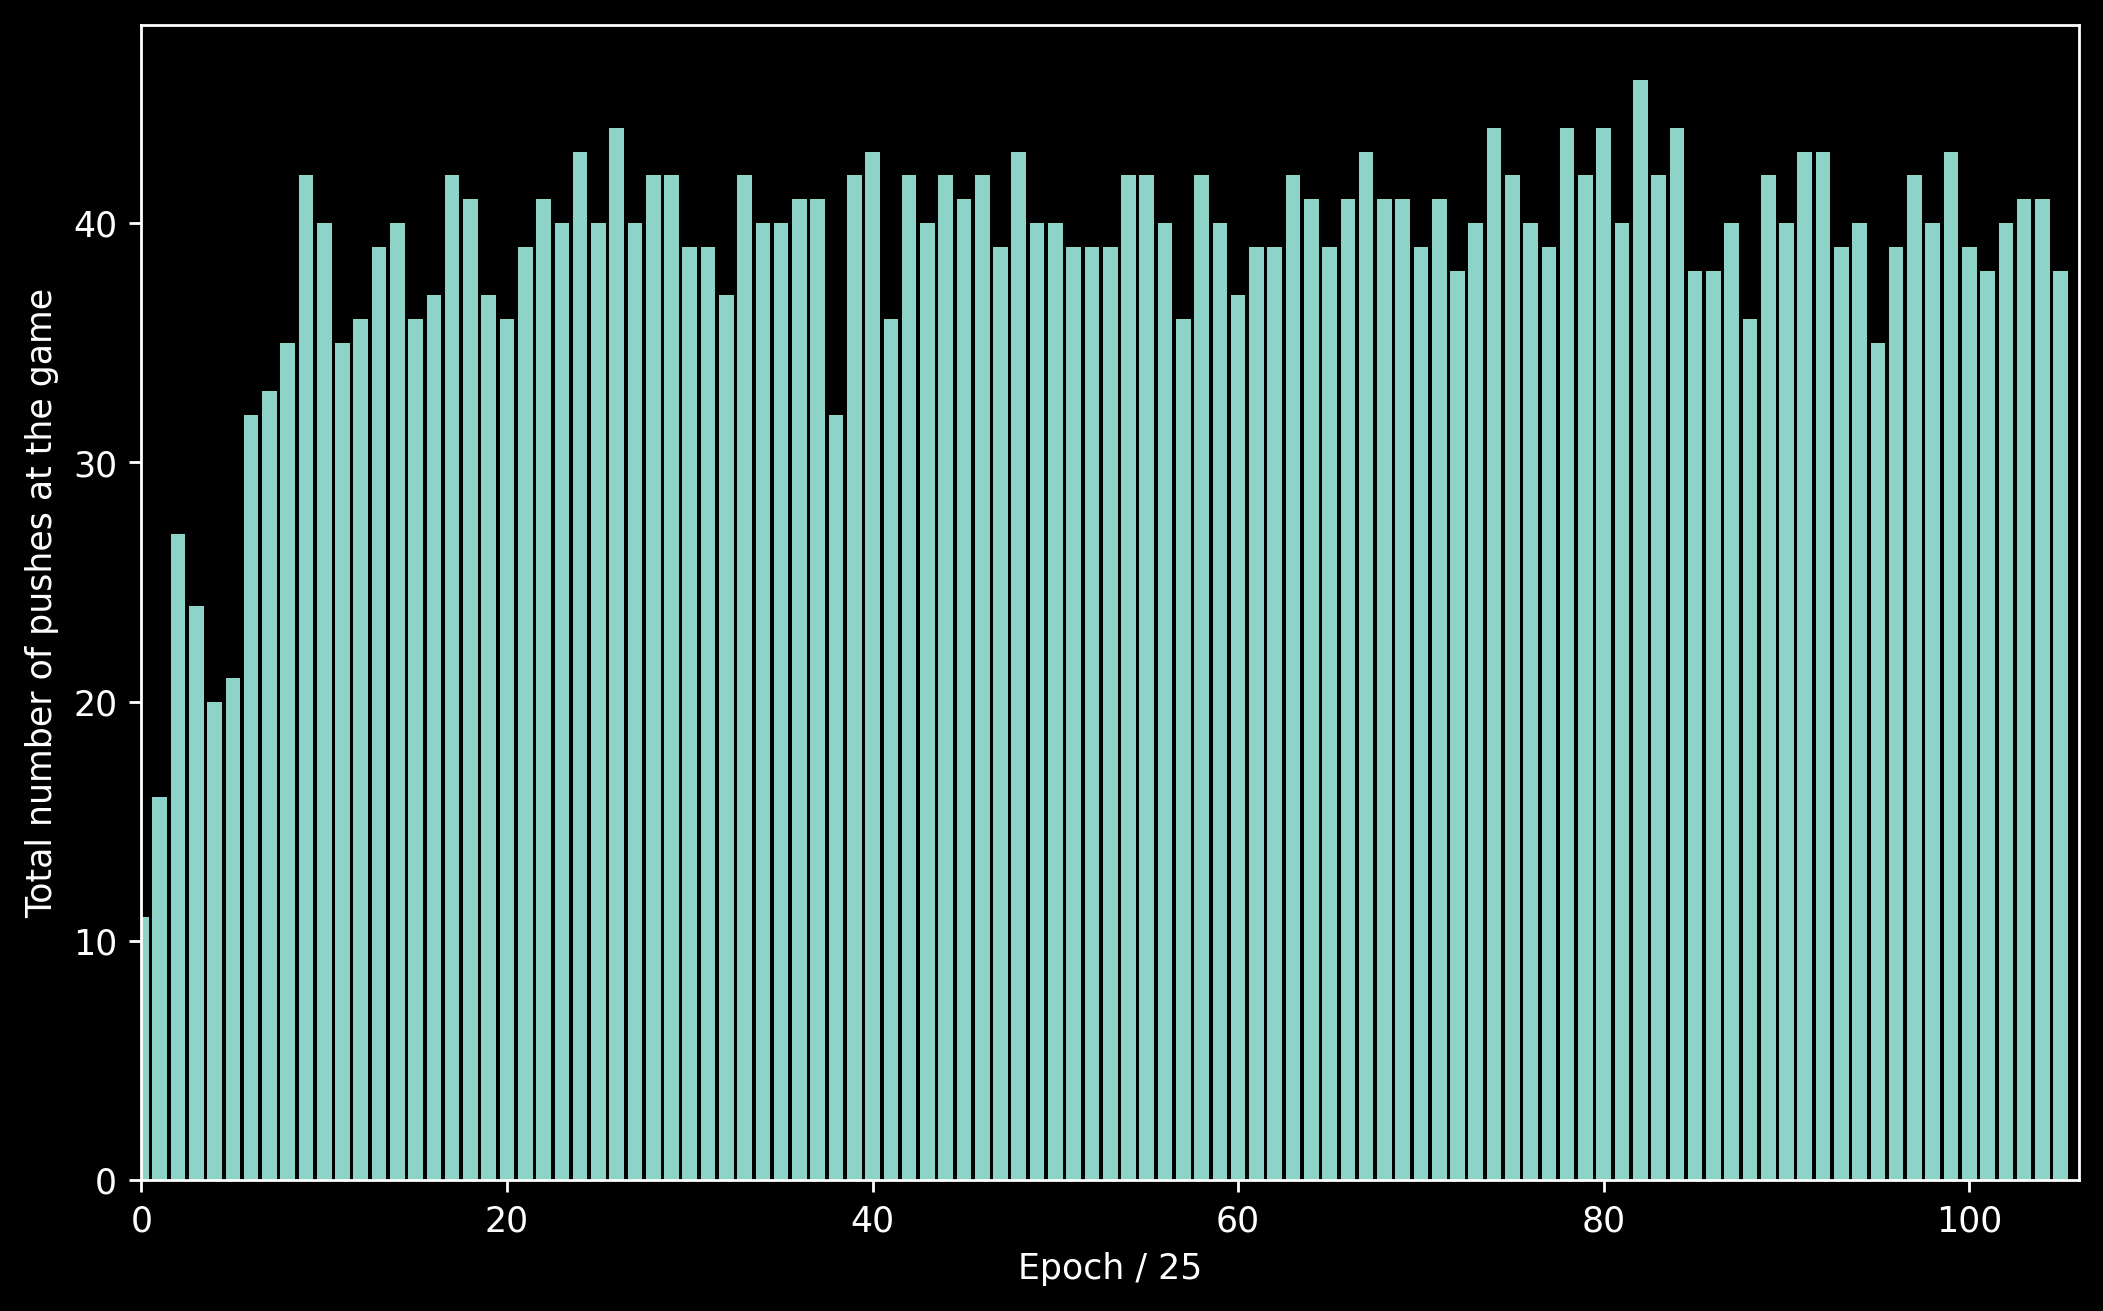

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the file and parse the data
with open('output.txt', 'r') as f:
    lines = f.readlines()[2:]
    
# Initialize lists to hold data
n_pushes =[]

# Parse each line
for line in lines:
    n_pushes.append(int(line[line.find('=')+2:].replace("\n",'')))

n_pushes = n_pushes[9::10]

# Create a list of indices for the x-axis
indices = range(len(n_pushes))

plt.figure(figsize=(10, 6), dpi=250)

# Create the bar chart
plt.bar(indices, n_pushes)

# Label the x-axis
plt.xlabel('Epoch / 25')

#limits
plt.xlim([0,len(n_pushes)])

# Label the y-axis
plt.ylabel('Total number of pushes at the game')

# Show the plot
plt.show()